IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
from numpy import ndarray
from PIL import Image
import matplotlib.pyplot as plt

Converting Image to Numpy array

In [2]:
img = Image.open('swan.jpg')
img_arr = np.array(img)
img_arr

array([[[ 88, 119, 148],
        [ 88, 119, 148],
        [ 88, 119, 148],
        ...,
        [ 86, 113, 142],
        [ 86, 113, 142],
        [ 85, 112, 141]],

       [[ 85, 116, 145],
        [ 85, 116, 145],
        [ 85, 116, 145],
        ...,
        [ 83, 110, 139],
        [ 84, 111, 140],
        [ 85, 112, 141]],

       [[ 86, 117, 146],
        [ 86, 117, 146],
        [ 87, 118, 147],
        ...,
        [ 81, 108, 137],
        [ 83, 110, 139],
        [ 85, 112, 141]],

       ...,

       [[ 63,  84, 113],
        [ 63,  84, 113],
        [ 63,  84, 113],
        ...,
        [ 44,  66,  90],
        [ 44,  68,  94],
        [ 45,  71,  96]],

       [[ 63,  84, 113],
        [ 62,  83, 112],
        [ 62,  83, 112],
        ...,
        [ 50,  72,  96],
        [ 49,  73,  99],
        [ 49,  75, 100]],

       [[ 63,  84, 113],
        [ 62,  83, 112],
        [ 61,  82, 111],
        ...,
        [ 47,  68,  95],
        [ 45,  69,  95],
        [ 44,  70,  95]]

Function to display Images

In [3]:
def display_img(image_array: ndarray, text: str = ''):
    plt.imshow(image_array, cmap='gray')

    if text != '':
        plt.title(text)

    plt.axis('off')
    return

Cropping Image

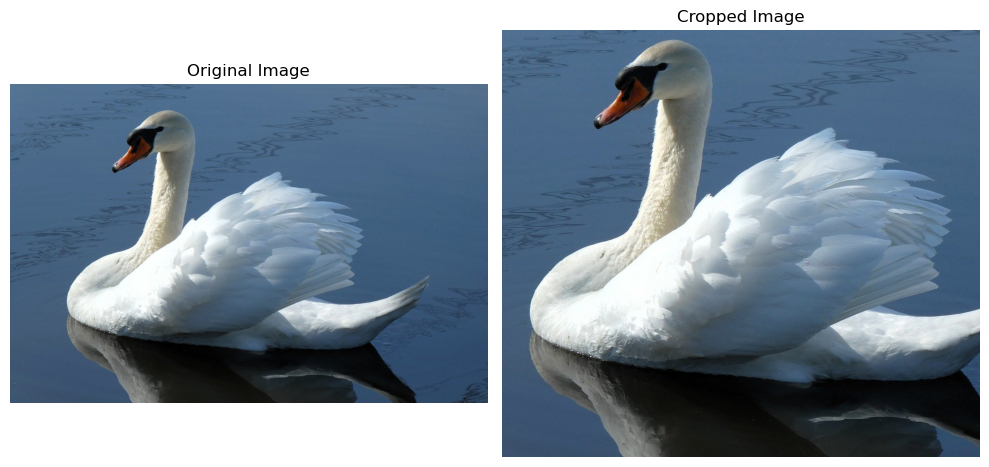

In [4]:
x1, y1 = 100, 50
x2_1, y2_1 = 1000, 900
x2_2, y2_2 = 1000, 1000

cropped_img_1 = img_arr[y1:y2_1, x1:x2_1]
cropped_img_2 = img_arr[y1:y2_2, x1:x2_2]

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
display_img(img_arr, "Original Image")

plt.subplot(1,2,2)
display_img(cropped_img_2, "Cropped Image")

plt.tight_layout()
plt.show()

Rotate Image

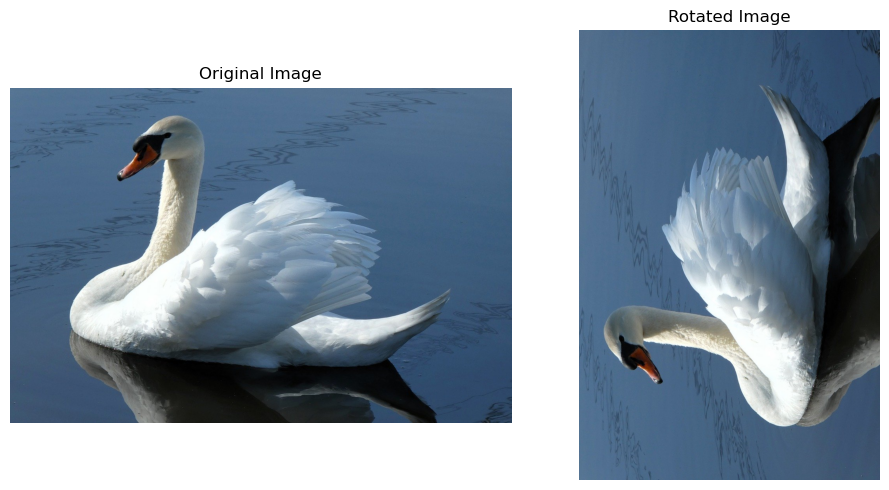

In [6]:
rotated_img = np.rot90(img_arr)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
display_img(img_arr, "Original Image")

plt.subplot(1,2,2)
display_img(rotated_img, "Rotated Image")

plt.tight_layout()
plt.show()

Flipping Image

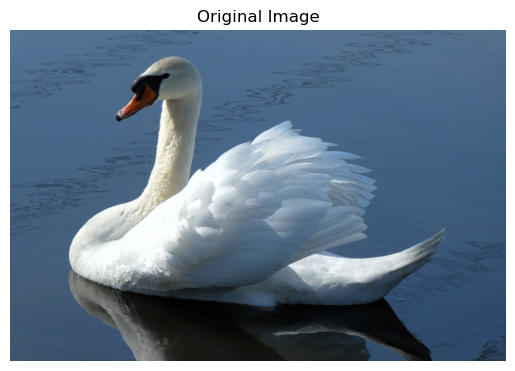

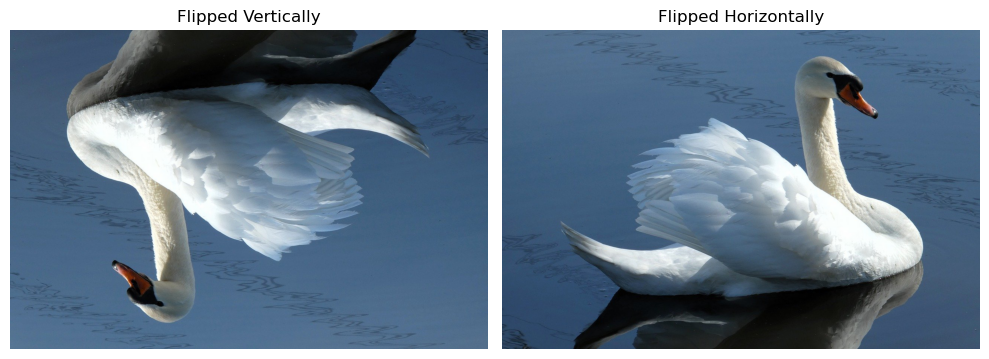

In [41]:
flip_horizontal_img = np.fliplr(img_arr)
flip_vertical_img = np.flipud(img_arr)

display_img("Original Image", img_arr)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
display_img("Flipped Vertically", flip_vertical_img)

plt.subplot(1,2,2)
display_img("Flipped Horizontally", flip_horizontal_img)

plt.tight_layout()
plt.show()

Negative of Image

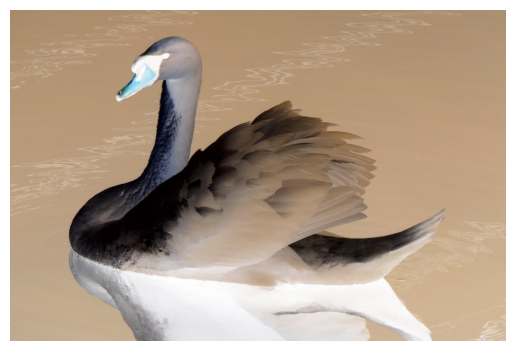

In [7]:
def is_rgb(image_array: ndarray) -> bool:
    if len(image_array.shape) < 3:
        return False
    else:
        return True

negative_img = 255 - img_arr

display_img(negative_img)
plt.show()

Binarizing an Image

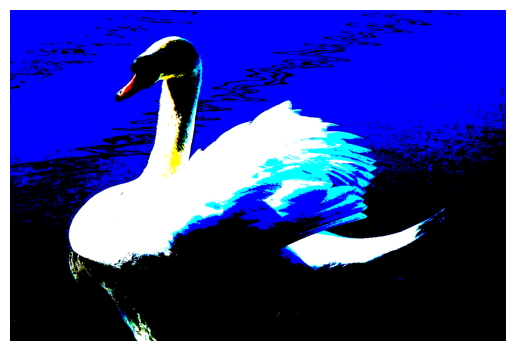

In [8]:
threshold = 128

binarised_img = np.where(img_arr < threshold, 0, 255)
display_img(binarised_img)
plt.show()

Grayscaling an Image

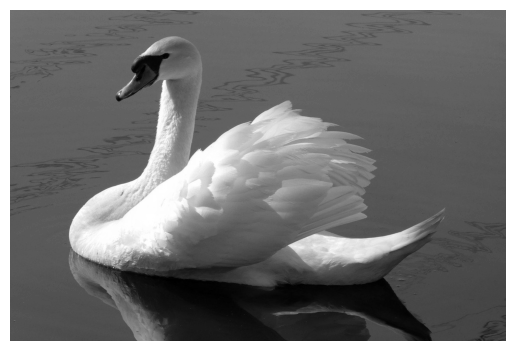

In [9]:
# Grayscale conversion formula: Y = 0.299*R + 0.587*G + 0.114*B
gray_convert_arr = np.array((0.299, 0.587, 0.114))
gray_img = np.dot(img_arr, gray_convert_arr)

display_img(gray_img)


Convolution

In [25]:
def convolve2d(image_array: ndarray, kernel: ndarray) -> ndarray:
    kernel = np.flipud(np.fliplr(kernel))

    rows, columns = image_array.shape[0], image_array.shape[1]
    krows, kcols = kernel.shape
    padrows, padcols = krows//2, kcols//2

    output = np.zeros_like(image_array)
    padded_img = np.pad(image_array, ((padrows, padrows), (padcols, padcols)), 'constant', constant_values=0)

    for row in range(rows):
        for col in range(columns):
            region = padded_img[row:row+krows, col:col+kcols]
            output[row, col] = np.clip(np.sum(region*kernel), 0, 255)
    
    return output

def convolve3d(image_array: ndarray, kernel: ndarray) -> ndarray:
    dimensions = image_array.ndim

    if dimensions > 3:
        return "Convolution not possible"

    if dimensions == 2:
        return convolve2d(image_array, kernel)
    
    else:
        channels = image_array.shape[-1]
        output = np.zeros_like(image_array)

        for c in range(channels):
            channel = image_array[:,:,c:c+1]
            output[:,:,c:c+1] = convolve2d(channel, kernel).reshape(channel.shape[0], channel.shape[1], channel.shape[-1])
        
        return output
    

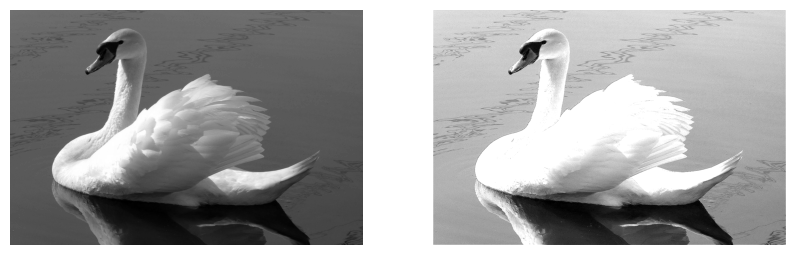

In [30]:
sharpen = np.array([[0, -1, 0],
                    [-1, 6, -1],
                    [0, -1, 0]])

sharpen_img = convolve3d(gray_img, sharpen)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
display_img(gray_img)

plt.subplot(1,2,2)
display_img(sharpen_img)

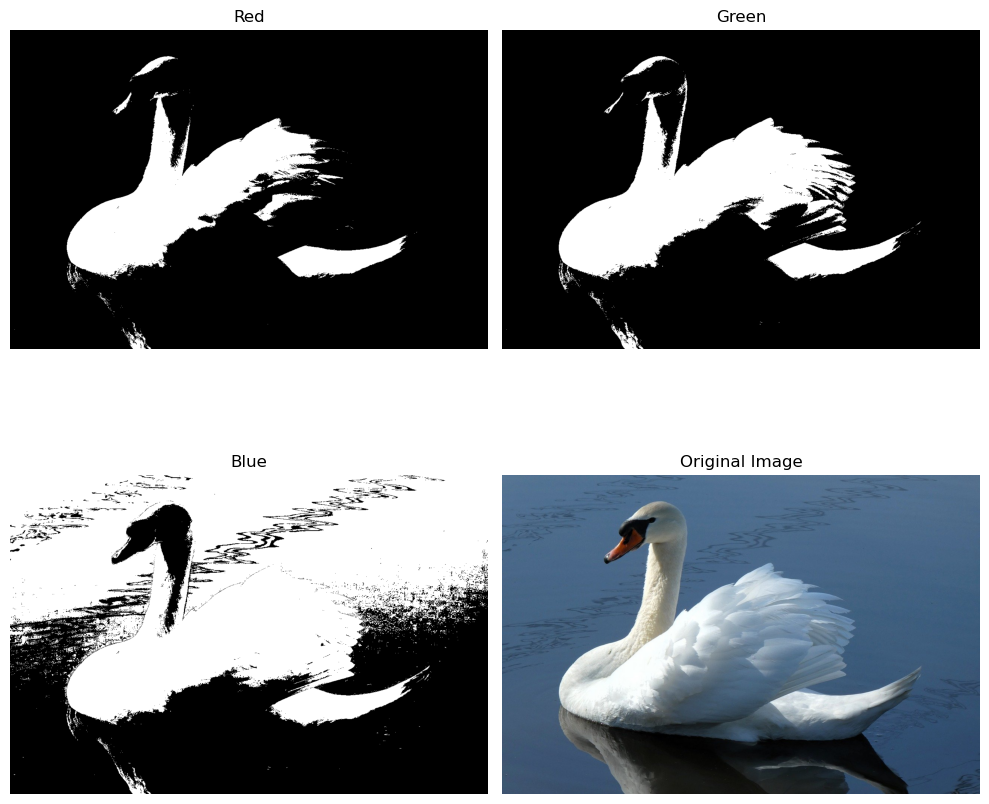

In [10]:
red_binarised, green_binarised, blue_binarised = binarised_img[:,:,0:1], binarised_img[:, :, 1:2], binarised_img[:, :, 2:]
red_only, green_only, blue_only = red_binarised.squeeze(), green_binarised.squeeze(), blue_binarised.squeeze()

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
display_img(red_only, "Red")

plt.subplot(2,2,2)
display_img(green_only, "Green")

plt.subplot(2,2,3)
display_img(blue_only, "Blue")

plt.subplot(2,2,4)
display_img(img_arr, "Original Image")

plt.tight_layout()
plt.show()

In [15]:
arr_1 = np.linspace(1, 20, 30).reshape(5,3,2)
print(arr_1)
print(arr_1.shape)
print()

arr_2 = np.linspace(1, 10, 30).reshape(5,3,2)
print(arr_2)
print(arr_2.shape)

print(arr_1[4][0])

[[[ 1.          1.65517241]
  [ 2.31034483  2.96551724]
  [ 3.62068966  4.27586207]]

 [[ 4.93103448  5.5862069 ]
  [ 6.24137931  6.89655172]
  [ 7.55172414  8.20689655]]

 [[ 8.86206897  9.51724138]
  [10.17241379 10.82758621]
  [11.48275862 12.13793103]]

 [[12.79310345 13.44827586]
  [14.10344828 14.75862069]
  [15.4137931  16.06896552]]

 [[16.72413793 17.37931034]
  [18.03448276 18.68965517]
  [19.34482759 20.        ]]]
(5, 3, 2)

[[[ 1.          1.31034483]
  [ 1.62068966  1.93103448]
  [ 2.24137931  2.55172414]]

 [[ 2.86206897  3.17241379]
  [ 3.48275862  3.79310345]
  [ 4.10344828  4.4137931 ]]

 [[ 4.72413793  5.03448276]
  [ 5.34482759  5.65517241]
  [ 5.96551724  6.27586207]]

 [[ 6.5862069   6.89655172]
  [ 7.20689655  7.51724138]
  [ 7.82758621  8.13793103]]

 [[ 8.44827586  8.75862069]
  [ 9.06896552  9.37931034]
  [ 9.68965517 10.        ]]]
(5, 3, 2)
[16.72413793 17.37931034]


In [84]:
arr[:,:][0]

array([[1.        , 2.68965517],
       [4.37931034, 6.06896552],
       [7.75862069, 9.44827586]])

In [104]:
0.299+0.587+0.114

0.9999999999999999